# Composite Models and depending pars

In [5]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED
from jetset.model_manager import FitModel


## Combine a Jet model with the EBL model (Multiplicative case)

We start by combining a Jet model with the EBL absorption model, i.e. a multiplicative  model. First, we define our Jet model

In [6]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl',name='jet_flaring')

In [7]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [8]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


the waring message is just telling that you are not passing any specific cosmology model to the `FitModel` class, so it is using a default one

In [9]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [10]:
composite_model.link_par(par_name='z_cosm', from_model=my_jet.name, to_model='Franceschini_2008')


==> par: z_cosm from model: jet_flaring linked to same parameter in model Franceschini_2008


In [11]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [19]:
t=composite_model.parameters.par_table

In [26]:
t['val'].mask==False

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

As you can see, now the paramter `z_cosm` in `jet_flaring` is the `master` parameter (flagged by the M in parenthesis), and the one belonging to the `Franceschini_2008` component is the linked one (flagged by the L in parenthesis).

## Setting parameters

These methods are alternative and equivalent ways to set a parameter in a composite model:

a) accessing the model component member of the 

b) using `set_par` and passing as first argument the model component name

c) using `set_par` and passing as first argument the model component object

In [8]:
#a
composite_model.Franceschini_2008.parameters.z_cosm.val=0.1
#b
composite_model.set_par('Franceschini_2008','z_cosm',0.1)
#c
composite_model.set_par(ebl_franceschini,'z_cosm',0.1)

And now, we can define the functional form of the model composition, just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [9]:
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D

--------------------------------------------------------------------------------


In [10]:
composite_model.composite_expr='jet_flaring*Franceschini_2008'

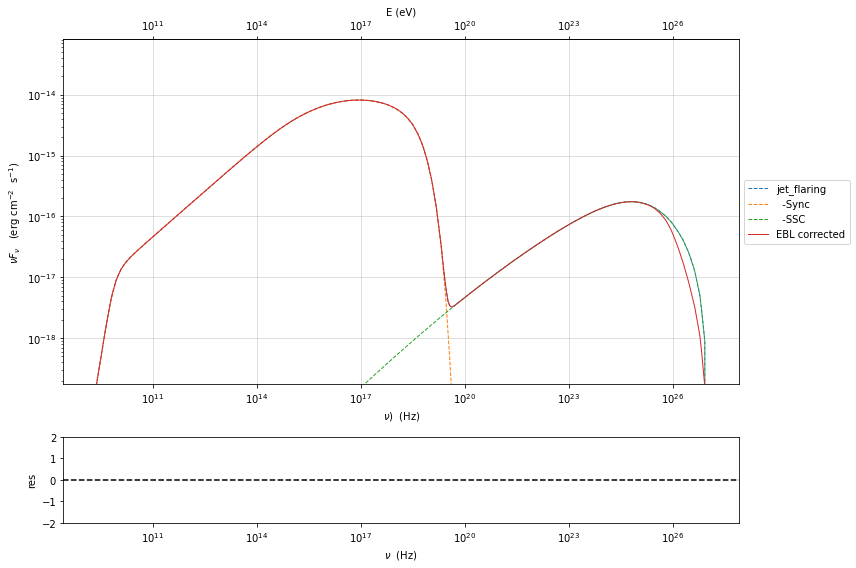

In [13]:
composite_model.jet_flaring.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
#p.rescale(y_max=-12)

In [14]:
composite_model.save_model('composite.pkl')
cm=FitModel.load_model('composite.pkl')

==> par: z_cosm from model: jet_flaring linked to same parameter in model Franceschini_2008


## Sum of two jets (steady and flaring) and application of the EBL absorption to both (Multiplicative and additive)

Assume that now we want to sum to jet models (a steady and flaring component) and apply to both of them the EBL absorption.

In [15]:
composite_model=FitModel(nu_size=500,name='EBL corrected flaring+steady')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)

/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/model_manager.py:147: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [16]:
steady_jet=Jet(electron_distribution='plc',name='steady_jet')
composite_model.add_component(steady_jet)
composite_model.show_model_components()


--------------------------------------------------------------------------------
Composite model description
--------------------------------------------------------------------------------
name: EBL corrected flaring+steady  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D
 -model name: steady_jet model type: jet

--------------------------------------------------------------------------------


now we link the same parameter `z_cosm` from the `steady_jet` to the same `master` parameter used for the `EBL` model, i.e. to the `jet_flaring` model

In [17]:
composite_model.link_par(par_name='z_cosm',from_model=['steady_jet'],to_model='Franceschini_2008') 

==> par: z_cosm from model: steady_jet linked to same parameter in model Franceschini_2008


In [18]:
composite_model.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
jet_flaring,"z_cosm(L,Franceschini_2008)",redshift,,--,--,--,False,True
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [19]:
composite_model.steady_jet.IC_nu_size=150


In [20]:
composite_model.composite_expr='(jet_flaring + steady_jet) * Franceschini_2008'

/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/plot_sedfit.py:276: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.sedplot.set_ylim(y_min,y_max)


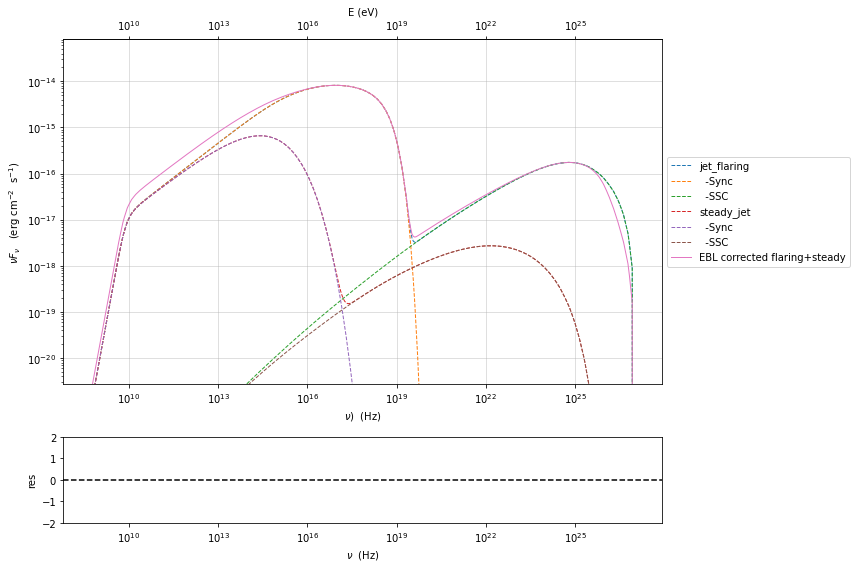

In [21]:
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)

In [22]:
composite_model.save_model('composite.pkl')

In [23]:
cm=FitModel.load_model('composite.pkl')

==> par: z_cosm from model: jet_flaring linked to same parameter in model Franceschini_2008
==> par: z_cosm from model: steady_jet linked to same parameter in model Franceschini_2008


In [23]:
cm.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
jet_flaring,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
jet_flaring,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
jet_flaring,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
jet_flaring,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
jet_flaring,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
jet_flaring,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
jet_flaring,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
jet_flaring,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
jet_flaring,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
jet_flaring,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
